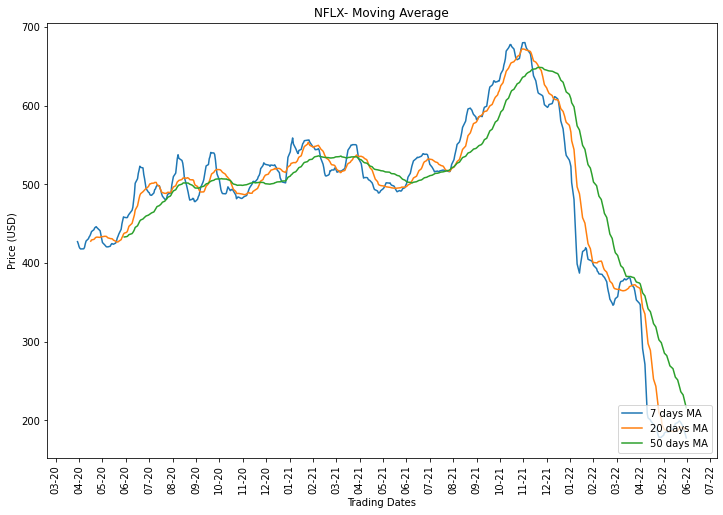

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ticker = 'NFLX'
period1 = '2020-04-17'
period2 = '2022-06-17'

data = pd.read_json(f"http://localhost:8080/marketdata/{ticker}/byDate?startDate={period1}&endDate={period2}")
data.index = pd.Index(data.date)
data = data[['close']]

data['7day MA'] = data.close.rolling(window=7).mean()
data['20day MA'] = data.close.rolling(window=20).mean()
data['50day MA'] = data.close.rolling(window=50).mean()
data.head(500)

plt.figure(figsize=(12, 8))
plt.title(ticker + '- Moving Average')
plt.plot(data.index, data[['7day MA', '20day MA', '50day MA']])
plt.xlabel('Trading Dates')
plt.ylabel('Price (USD)')
plt.xticks(data.index[::12], rotation='vertical')
plt.legend(('7 days MA', '20 days MA', '50 days MA'), loc='lower right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 
plt.show()


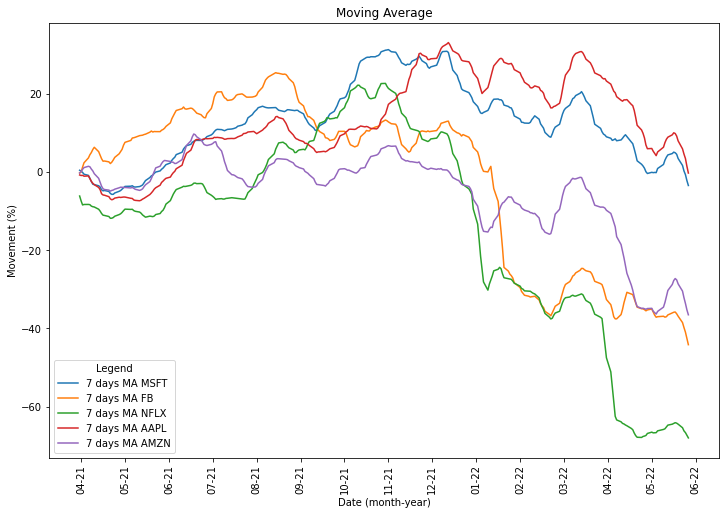

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


ticker = ['MSFT','FB','NFLX', 'AAPL', 'AMZN']
period1 = '2021-04-17'
period2 = '2022-06-18'

plt.figure(figsize=(12, 8))
plt.title('Moving Average')
plt.xlabel('Date (month-year)')
plt.ylabel('Movement (%)')

for i in ticker:
    data = pd.read_json(f"http://localhost:8080/marketdata/{i}/byDate?startDate={period1}&endDate={period2}")
    data.index = pd.Index(data.date)
    data = data[['close']]
    data['change'] = (data.close/data.close.iloc[0] -1)*100

    data['7day MA'] = data.change.rolling(window=7).mean()
    data.head(500)
    
    plt.plot(data.index, data[['7day MA']], label='7 days MA ' + i)
    plt.xticks(data.index[::12], rotation='vertical')
    plt.legend(loc='lower left', title='Legend')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 
plt.show()


In [31]:
import pandas as pd

ticker = ['IXIC','FB','NFLX', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'GSPC']
period1 = '2021-04-17'
period2 = '2022-06-13'


frames = []
for i in ticker:
    data = pd.read_json(f"http://localhost:8080/marketdata/{i}/byDate?startDate={period1}&endDate={period2}")
    data.index = pd.Index(data.date)
    data = data[['close']]
    data['change'] = (data.close / data.close.iloc[0] - 1) * 100

    data[i] = data.change.rolling(window=7).mean()
    data = data[[i]]
    data.head(500)
    frames.append(data)
result = pd.concat(frames, axis=1, join='inner')
correlation = result.corr(method='pearson')

correlation.style.background_gradient(axis=0, cmap='RdYlGn_r')

,IXIC,FB,NFLX,MSFT,GOOG,AAPL,AMZN,GSPC
IXIC,1.000000,0.778336,0.924746,0.712847,0.877778,0.211839,0.875950,0.864881
FB,0.778336,1.000000,0.864612,0.214123,0.476186,-0.315356,0.780115,0.426202
NFLX,0.924746,0.864612,1.000000,0.494360,0.706956,-0.098942,0.868347,0.658913
MSFT,0.712847,0.214123,0.494360,1.000000,0.893301,0.733880,0.361538,0.918746
GOOG,0.877778,0.476186,0.706956,0.893301,1.000000,0.536464,0.637970,0.933185
AAPL,0.211839,-0.315356,-0.098942,0.733880,0.536464,1.000000,-0.062253,0.641587
AMZN,0.875950,0.780115,0.868347,0.361538,0.637970,-0.062253,1.000000,0.612484
GSPC,0.864881,0.426202,0.658913,0.918746,0.933185,0.641587,0.612484,1.000000
